- Open & Save Image
- Image Basics
- Simple Drawing
- Basic Image Processing

In [0]:
# Kasih izin google colab untuk dapat mengakses gambar
from google.colab import drive
drive.mount ('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# cek apakah benar-benar dapat mengakses
import os
os.listdir('/content/gdrive/My Drive')

['FOTO',
 'Colab Notebooks',
 'Exercise',
 'ASTRA - Case',
 'DATA - Sent',
 'ITS',
 'LIFE',
 'Untitled document (1).gdoc',
 'Practice Case BigQuery ML - Afifah Nur Iswari.docx.pdf',
 'results-20191017-202844.gsheet',
 'Untitled document.gdoc',
 '19.10.08_Impala I.gdoc',
 'Practice Case 2 BigQuery ML - Afifah Nur Iswari.docx.pdf',
 'Boston Housing.gslides',
 'Image Processing.ipynb']

In [0]:
import cv2
# library bantuan google lagi
from google.colab.patches import cv2_imshow

In [0]:
img = cv2.imread ('/content/gdrive/My Drive/panda.JPG') #untuk buka gambar

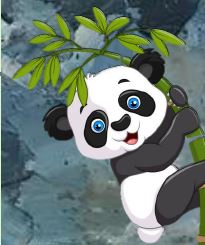

In [0]:
cv2_imshow(img)

In [0]:
print (img)

[[[228 240 220]
  [108 119  99]
  [110 112  93]
  ...
  [120 109  82]
  [116 105  78]
  [120 109  81]]

 [[227 239 219]
  [107 118  98]
  [111 113  94]
  ...
  [115 104  77]
  [109  98  71]
  [114 103  75]]

 [[227 239 219]
  [106 117  97]
  [110 112  93]
  ...
  [105  94  67]
  [ 98  87  60]
  [107  96  68]]

 ...

 [[236 246 210]
  [115 122  85]
  [119 119  83]
  ...
  [ 24  87  95]
  [ 24  83  92]
  [ 24  80  91]]

 [[240 250 214]
  [118 125  88]
  [122 122  86]
  ...
  [ 24  93  90]
  [ 26  93  90]
  [ 29  94  92]]

 [[238 248 212]
  [116 123  86]
  [119 119  83]
  ...
  [ 19  97  80]
  [ 23  98  82]
  [ 29 103  85]]]


In [0]:
# ukuran matrix (panjang, lebar, rgb)
print (img.shape)

(245, 205, 3)


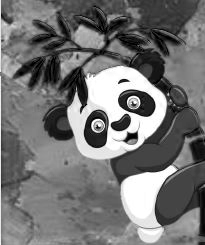

In [0]:
# karena gambar bentuknya sudah matrix, misal kita mau melakukan croping pada gambar

# ambil layer blue nya saja, tapi baru bisa jadiin black-white
cv2_imshow(img[:,:,0]) 

In [0]:
img_chan = []
for chan in cv2.split (img) :  #split rgb nya 
  img_chan.append(chan)
  

In [0]:
len(img_chan) 

3

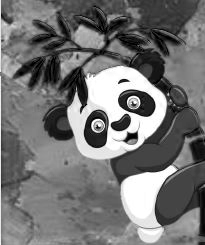

In [0]:
cv2_imshow(img_chan[0]) # sama aja baru bisa ambil black-white

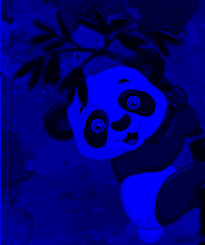

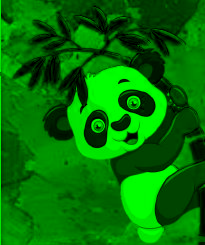

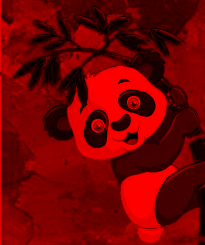

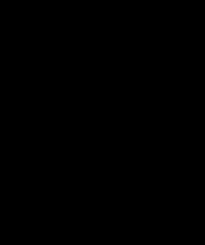

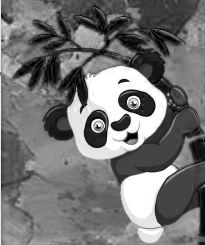

In [0]:
# matriks nol sama dengan ukuran gambarnya (jadi BGR kalau di OpenCV)
import numpy as np
zeros = np.zeros(img.shape[:2], dtype = 'uint8')
# blue
cv2_imshow(cv2.merge([img_chan[0], zeros, zeros])) 
# green
cv2_imshow(cv2.merge([zeros, img_chan[0], zeros])) 
# red
cv2_imshow(cv2.merge([zeros, zeros, img_chan[0]])) 

cv2_imshow(cv2.merge([zeros, zeros, zeros])) 
cv2_imshow(cv2.merge([img_chan[0], img_chan[0], img_chan[0]])) 

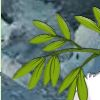

In [0]:
# drawing sederhana

# croping gambar
img = img [0:100, 0:100]
cv2_imshow(img)

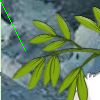

In [0]:
# membuat garis
hijau = (0,255, 0)
cv2.line (img, (0,0), (25, 50), hijau)
cv2_imshow(img) 


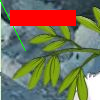

In [0]:
# membuat shape
merah = (0, 0, 255)
cv2.rectangle (img, (10,10), (75,25), merah, -1)
cv2_imshow(img)

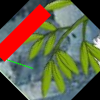

In [0]:
# mau cari tengahnya (central point)
(h, w) = img.shape[:2]
(cX, cY) = (w/2, h/2)

M = cv2.getRotationMatrix2D((cX,cY), 45, 1) #(central, derajat, ukurannya tetap maka 1)

# membuat rotate 
rotated = cv2.warpAffine(img, M, (w,h))
cv2_imshow(rotated)